In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ANKITHA\Downloads/winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [3]:
df.shape

(6497, 14)

In [4]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
6492    False
6493    False
6494    False
6495    False
6496    False
Length: 6497, dtype: bool

In [6]:
df=df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  good                  5320 non-null   int64  
 13  color                 5320 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 623.4+ KB


In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

# Data Preprocessing

In [9]:
# Split the data
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'good', 'color']]
y = df[['quality']]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3990, 13) (3990, 1)
(1330, 13) (1330, 1)


# Separate Numerical and Categorical Features

In [11]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [12]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
24,-0.232448,0.329004,-1.192456,-0.585862,0.804394,-0.506461,-1.296924,0.768267,1.252118,0.642708,-0.726266,-0.485860
1791,-0.309791,-0.380930,0.286217,0.653463,-0.320475,-0.121068,0.153120,-0.580131,-1.282517,-1.099870,0.699668,-0.485860
5708,-1.701978,-0.528833,-0.654757,-0.519469,-0.376719,0.869941,0.677232,-0.721713,3.230370,1.513997,0.615789,-0.485860
5101,-0.387135,-0.321769,0.891129,2.047704,-0.067379,-0.010956,1.166404,1.405385,-0.540673,0.240575,-1.229537,-0.485860
5255,-0.077760,-0.380930,-0.251482,0.764117,-0.742301,-0.286236,1.341108,-0.384613,-0.417032,-0.496670,1.370695,2.058208


# Testing

In [13]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [14]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns=X_test_num.columns, 
                                   index=X_test_num.index)
X_test_num_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
1397,0.076927,1.453067,-0.385907,-0.674385,0.663786,-0.726685,-0.178818,0.444652,0.324813,-0.094537,-0.558509,-0.485860
46,0.386302,3.494129,0.756704,-0.630123,1.619925,-0.451405,-0.004114,0.835687,0.139351,1.312930,-1.145658,-0.485860
4758,-0.232448,-0.913381,0.017367,0.631333,-0.404840,-0.010956,0.275413,0.013164,1.066657,-0.965826,-0.055239,-0.485860
5129,-0.000417,-0.203446,0.219005,0.476417,-0.292353,0.814885,1.113993,0.330038,-0.540673,-0.027514,-0.726266,-0.485860
6364,-1.547290,-0.262608,0.151792,-0.785039,-0.517327,-0.671629,-0.318581,-1.719528,2.055783,-0.362626,2.041723,2.058208


# Feature Engineering: Applying One-Hot Encoding on Categorical Features

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)

X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (3990, 1)
Shape of Data after Transformation: (3990, 2)


,color_red,color_white
24,1.0,0.0
1791,0.0,1.0
5708,0.0,1.0
5101,0.0,1.0
5255,0.0,1.0


# Testing

In [16]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [17]:
X_test_cat_tansformed = pd.DataFrame(encoder_.transform(X_test_cat), 
                        columns=encoder_.get_feature_names_out(), 
                        index=X_test_cat.index)
X_test_cat_tansformed.head()

,color_red,color_white
1397,1.0,0.0
46,1.0,0.0
4758,0.0,1.0
5129,0.0,1.0
6364,0.0,1.0


# X_train_transformed

In [18]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)
X_train_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color_red,color_white
24,-0.232448,0.329004,-1.192456,-0.585862,0.804394,-0.506461,-1.296924,0.768267,1.252118,0.642708,-0.726266,-0.485860,1.0,0.0
1791,-0.309791,-0.380930,0.286217,0.653463,-0.320475,-0.121068,0.153120,-0.580131,-1.282517,-1.099870,0.699668,-0.485860,0.0,1.0
5708,-1.701978,-0.528833,-0.654757,-0.519469,-0.376719,0.869941,0.677232,-0.721713,3.230370,1.513997,0.615789,-0.485860,0.0,1.0
5101,-0.387135,-0.321769,0.891129,2.047704,-0.067379,-0.010956,1.166404,1.405385,-0.540673,0.240575,-1.229537,-0.485860,0.0,1.0
5255,-0.077760,-0.380930,-0.251482,0.764117,-0.742301,-0.286236,1.341108,-0.384613,-0.417032,-0.496670,1.370695,2.058208,0.0,1.0


# X_test_transformed

In [19]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_tansformed], axis=1)
X_test_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color_red,color_white
1397,0.076927,1.453067,-0.385907,-0.674385,0.663786,-0.726685,-0.178818,0.444652,0.324813,-0.094537,-0.558509,-0.485860,1.0,0.0
46,0.386302,3.494129,0.756704,-0.630123,1.619925,-0.451405,-0.004114,0.835687,0.139351,1.312930,-1.145658,-0.485860,1.0,0.0
4758,-0.232448,-0.913381,0.017367,0.631333,-0.404840,-0.010956,0.275413,0.013164,1.066657,-0.965826,-0.055239,-0.485860,0.0,1.0
5129,-0.000417,-0.203446,0.219005,0.476417,-0.292353,0.814885,1.113993,0.330038,-0.540673,-0.027514,-0.726266,-0.485860,0.0,1.0
6364,-1.547290,-0.262608,0.151792,-0.785039,-0.517327,-0.671629,-0.318581,-1.719528,2.055783,-0.362626,2.041723,2.058208,0.0,1.0


# Model Training
# 1.KNN

In [20]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [21]:
y_test_pred = regressor.predict(X_test_transformed)

In [22]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_test_pred)

0.4037593984962406

In [23]:
output_df = pd.DataFrame({'Actual': y_test.values.flatten()}, index=X_test.index)

In [24]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,KNN Regression Predictions
1397,5,5.4
46,5,5.0
4758,6,6.0
5129,5,5.6
6364,8,7.2
...,...,...
3791,6,5.8
5088,8,7.0
5648,6,6.0
6211,5,5.2


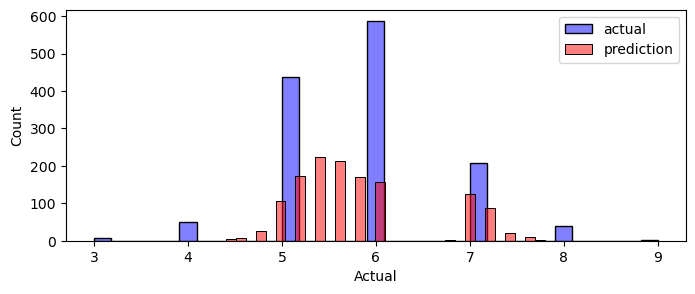

In [25]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# 2.Decisison Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [27]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_test_pred)

0.3069774436090225

In [28]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,KNN Regression Predictions,DT Regression Predictions
1397,5,5.4,5.4
46,5,5.0,5.0
4758,6,6.0,6.0
5129,5,5.6,5.6
6364,8,7.2,7.2
...,...,...,...
3791,6,5.8,5.8
5088,8,7.0,7.0
5648,6,6.0,6.0
6211,5,5.2,5.2


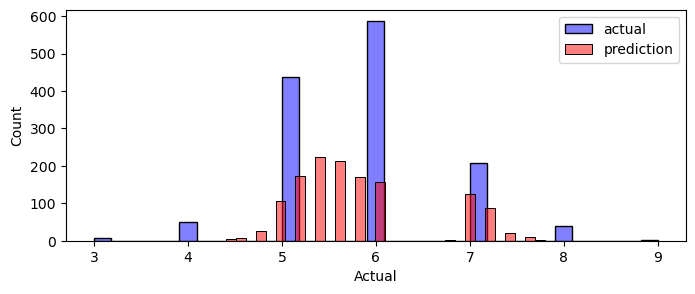

In [29]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# 3.Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [31]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

0.5540554517456014

In [32]:
output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,KNN Regression Predictions,DT Regression Predictions,Linear Regression Predictions
1397,5,5.4,5.4,5.4
46,5,5.0,5.0,5.0
4758,6,6.0,6.0,6.0
5129,5,5.6,5.6,5.6
6364,8,7.2,7.2,7.2
...,...,...,...,...
3791,6,5.8,5.8,5.8
5088,8,7.0,7.0,7.0
5648,6,6.0,6.0,6.0
6211,5,5.2,5.2,5.2


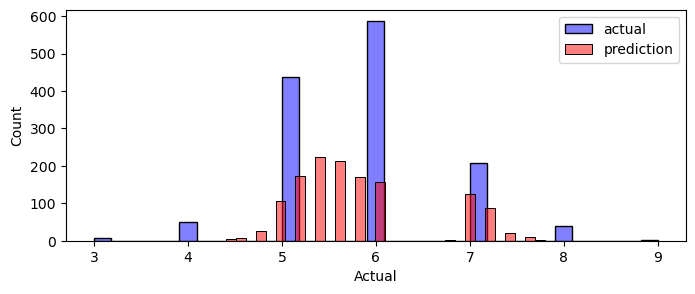

In [33]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# 4.Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

C:\ProgramData\Anaconda3_\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [35]:
y_test_pred = regressor.predict(X_test_transformed)

In [36]:
from sklearn import metrics
metrics.r2_score(y_test, y_test_pred)

0.6523792126032772

In [37]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,KNN Regression Predictions,DT Regression Predictions,Linear Regression Predictions,RF Regression Predictions
1397,5,5.4,5.4,5.4,5.23
46,5,5.0,5.0,5.0,4.98
4758,6,6.0,6.0,6.0,5.64
5129,5,5.6,5.6,5.6,5.38
6364,8,7.2,7.2,7.2,7.12
...,...,...,...,...,...
3791,6,5.8,5.8,5.8,5.41
5088,8,7.0,7.0,7.0,7.09
5648,6,6.0,6.0,6.0,5.95
6211,5,5.2,5.2,5.2,5.30


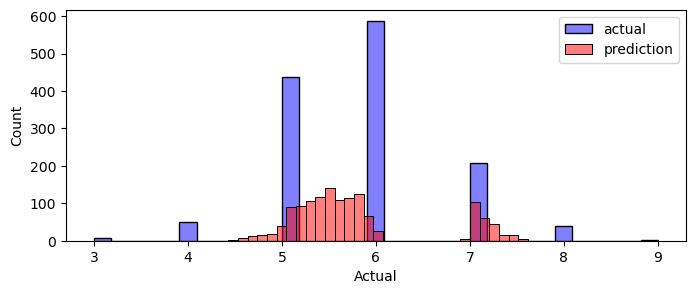

In [38]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['RF Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# COMPARISION OF MODELS

In [39]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()

,Model,Prediction
0,Actual,5.0
1,Actual,5.0
2,Actual,6.0
3,Actual,5.0
4,Actual,8.0


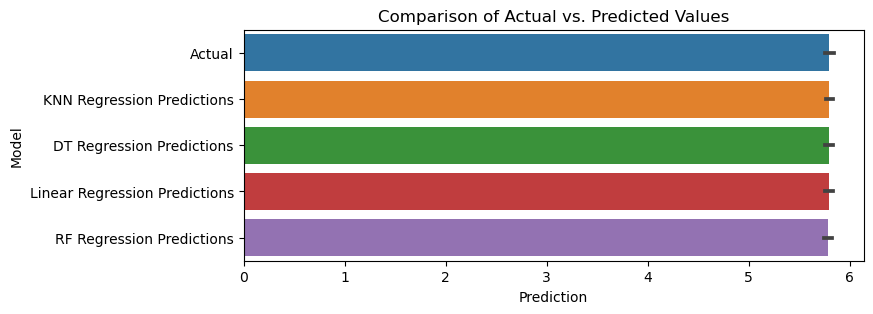

In [40]:
fig, ax = plt.subplots(figsize=(8,3))

sns.barplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()

# Conclusion:

# From the above comparison we can conclude that, KNN Regression,DT Regression,Linear Regression,RF Regression can equally predict for the Wine Prediction problem